# TensorFlow for Image Recognition/Classification
### We will be using Tensorflow's deep learning capabilites to recognise hand gestures, then we will be testing it using mediapipe in real time

In [38]:
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, concatenate
from PIL import Image
assert tf.__version__.startswith('2')
import numpy as np

import matplotlib.pyplot as plt
#use tf anaconda env

In [39]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [40]:
dataset_path = "datasets"
print(dataset_path)
labels = []
for i in os.listdir(dataset_path):
  if os.path.isdir(os.path.join(dataset_path, i)):
    labels.append(i)
print(labels)

datasets
['paper', 'rock', 'scissors']


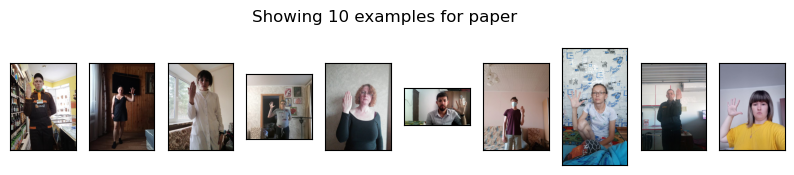

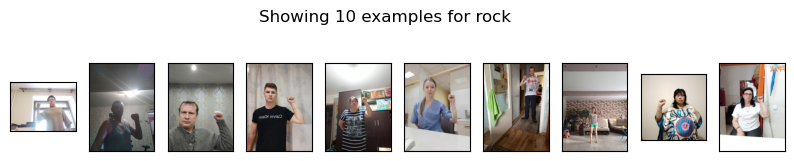

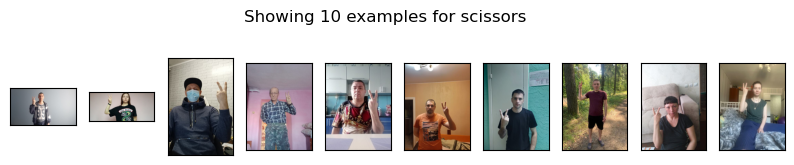

In [41]:
NUM_EXAMPLES = 10

for label in labels:
  label_dir = os.path.join(dataset_path, label)
  example_filenames = os.listdir(label_dir)[:NUM_EXAMPLES]
  fig, axs = plt.subplots(1, NUM_EXAMPLES, figsize=(10,2))
  for i in range(NUM_EXAMPLES):
    axs[i].imshow(plt.imread(os.path.join(label_dir, example_filenames[i])))
    axs[i].get_xaxis().set_visible(False)
    axs[i].get_yaxis().set_visible(False)
  fig.suptitle(f'Showing {NUM_EXAMPLES} examples for {label}')

plt.show()

## Train test split

In [42]:
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

# Change target_size to (224, 224)
target_size = (224, 224)

train_set = datagen.flow_from_directory(
    dataset_path,
    target_size=target_size,
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

test_set = datagen.flow_from_directory(
    dataset_path,
    target_size=target_size,
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

train_image_shape = train_set.image_shape
print("Shape of images in the train set:", train_image_shape)

# Check the shape of images in the test set
test_image_shape = test_set.image_shape
print("Shape of images in the test set:", test_image_shape)

Found 8276 images belonging to 3 classes.
Found 918 images belonging to 3 classes.
Shape of images in the train set: (224, 224, 3)
Shape of images in the test set: (224, 224, 3)


## CNN model
We will be using VGG-16, which is a convolutional neural network that is 16 layers deep.


In [44]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model

# Load pre-trained VGG16 model (excluding the top classification layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional layers to prevent further training
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers for your specific task
flatten_layer = Flatten()(base_model.output)
dense_layer1 = Dense(256, activation='relu')(flatten_layer)
output_layer = Dense(3, activation='softmax')(dense_layer1)  # Replace num_classes with the number of classes in your task

# Create the custom VGG16 model
custom_model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model (choose an appropriate optimizer and loss function)
custom_model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

# Optionally, you can print a summary of the model architecture
custom_model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [45]:
custom_model.fit(x=train_set, validation_data=test_set, epochs=20)

Epoch 1/20
259/259 [==============================] - 1058s 4s/step - loss: 1.0943 - accuracy: 0.4093 - val_loss: 1.0820 - val_accuracy: 0.3954
Epoch 2/20
259/259 [==============================] - 1103s 4s/step - loss: 1.0496 - accuracy: 0.4142 - val_loss: 1.0465 - val_accuracy: 0.4063
Epoch 3/20
259/259 [==============================] - 1039s 4s/step - loss: 1.0396 - accuracy: 0.4259 - val_loss: 1.0359 - val_accuracy: 0.4063
Epoch 4/20
259/259 [==============================] - 980s 4s/step - loss: 1.0310 - accuracy: 0.4432 - val_loss: 1.0515 - val_accuracy: 0.3943
Epoch 5/20
259/259 [==============================] - 958s 4s/step - loss: 1.0238 - accuracy: 0.4482 - val_loss: 1.0361 - val_accuracy: 0.4292
Epoch 6/20
259/259 [==============================] - 1154s 4s/step - loss: 1.0109 - accuracy: 0.4653 - val_loss: 0.9981 - val_accuracy: 0.4379
Epoch 7/20
259/259 [==============================] - 966s 4s/step - loss: 1.0139 - accuracy: 0.4675 - val_loss: 0.9950 - val_accuracy: 0.

In [49]:
custom_model.save("C:\Projects")

INFO:tensorflow:Assets written to: C:\Projects\assets


INFO:tensorflow:Assets written to: C:\Projects\assets
